In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [39]:
# 데이터셋 불러오기 / eai.xlsx

import os
os.getcwd()
os.chdir(r'/Users/siwoolchoi/Desktop/siwooly/대학원/통계와확률/data')


eai = pd.read_excel('eai.xlsx')
eai 

,Employee,Annual Salary,Training Program
0,1,75769.5,No
1,2,70823.0,Yes
2,3,68408.2,No
3,4,69787.5,No
4,5,72801.6,Yes
...,...,...,...
2495,2496,76873.5,No
2496,2497,67860.7,Yes
2497,2498,76543.7,Yes
2498,2499,73168.8,Yes


모집단 분포 

In [40]:
eai['Annual Salary']

0       75769.5
1       70823.0
2       68408.2
3       69787.5
4       72801.6
         ...   
2495    76873.5
2496    67860.7
2497    76543.7
2498    73168.8
2499    68433.3
Name: Annual Salary, Length: 2500, dtype: float64

In [41]:
mean = eai['Annual Salary'].mean()
std = eai['Annual Salary'].std(ddof=0) # delta degree of freedom : ddof

mean, std

(np.float64(71800.0), 3999.199986577316)

In [42]:
salary = eai['Annual Salary']
salary

0       75769.5
1       70823.0
2       68408.2
3       69787.5
4       72801.6
         ...   
2495    76873.5
2496    67860.7
2497    76543.7
2498    73168.8
2499    68433.3
Name: Annual Salary, Length: 2500, dtype: float64

In [43]:
# np.std(salary) / ddof default = 0 
# salary.std() eai['Annual Salary'].std() / ddof default = 1

In [44]:
mean, np.ceil(std)

(np.float64(71800.0), np.float64(4000.0))

In [45]:
eai['Training Program']

0        No
1       Yes
2        No
3        No
4       Yes
       ... 
2495     No
2496    Yes
2497    Yes
2498    Yes
2499    Yes
Name: Training Program, Length: 2500, dtype: object

In [46]:
yes_ratio = eai['Training Program'].value_counts(normalize=True)['Yes']  # 정규화

no_ratio = eai['Training Program'].value_counts(normalize=True)['No']

yes_ratio, no_ratio

(np.float64(0.6), np.float64(0.4))

6.3 점추정

In [47]:
eai_sample = eai.sample(n=30, random_state=1).reset_index(drop=True)
eai_sample 
# random_state 고정 해야 함! 1번 랜덤 한 것을 유지시켜서 똑같이 사용하기 위해서!

,Employee,Annual Salary,Training Program
0,1407,78237.4,Yes
1,298,73036.3,Yes
2,1277,71922.8,No
3,2369,68539.7,No
4,439,74034.7,Yes
5,2010,72746.7,No
6,643,73503.4,No
7,656,66576.5,Yes
8,1194,72134.8,Yes
9,2411,74683.2,No


In [48]:
# 표본평균
sample_mean = eai_sample['Annual Salary'].mean()

# 표본평균 편차
sample_std = eai_sample['Annual Salary'].std(ddof=1)

# 표본비율
sample_ratio = eai_sample['Training Program'].value_counts(normalize=True)['Yes']

sample_mean, sample_std, sample_ratio

(np.float64(72040.48333333332),
 3201.5728339508296,
 np.float64(0.6333333333333333))

7.4 표본분포 개요

In [49]:
# 가상의 데이터프레임 생성 (2500개의 요소)

# 난수 전체 흐름을 고정
np.random.seed(1)

# 500개의 seed를 미리 생성 
seeds = np.random.randint(0, 10000, size=500)

seeds

array([ 235, 5192,  905, 7813, 2895, 5056,  144, 4225, 7751, 3462, 9394,
       5396, 5374, 2962, 2516, 8444, 3562, 4764, 8093, 6542,  562, 8151,
       3049,  753, 9719, 1888, 1110, 6285, 6121, 1031, 4415, 2877, 3606,
       9529, 2561, 8920, 6771,  431, 4074,  542, 9287, 1478, 1337, 7108,
       8689, 1612, 3098, 1844, 9552, 2669,   15, 2244, 7906, 1306, 9832,
       1046, 3047, 1150, 9495, 3428,  155, 4409,  648, 9504, 7586, 1679,
       7255, 7961, 4039,  243, 1372, 1214, 7470, 5024, 5848, 5271, 4791,
       9537, 9987, 2944, 5373,  461, 1798, 4565, 1478, 4059,  715, 6407,
       6221, 2760, 5195, 7500, 1067, 7710, 9764, 9991, 3885, 6713, 7676,
         96,  269, 6423,  889,  152, 9930, 3212, 8798, 7740,  489,  152,
       3410, 4979, 2178, 9948, 7862, 5984, 2518, 3270, 8519, 7183,   20,
       6774, 1968, 6422, 6629, 3981, 2033,  609, 5813, 1876, 3082, 7264,
        183, 6461, 3640, 7897, 8597, 3303, 7264,  505, 8147, 5145, 5617,
       5006, 2189, 7796, 9003, 3718, 1741,  696, 19

In [50]:
# 30개 짜리 표본을 500개 추출
# 각 표본에서 'Annual Salary'의 평균 계산, 'Training Program'에서 'Yes' 비율 계산

sample_means = []
sample_ratios = []

for seed in seeds:
    sample = eai.sample(n=30, random_state=seed)
    sample_mean = sample['Annual Salary'].mean()
    sample_ratio = (sample['Training Program'] == 'Yes').mean()
    sample_means.append(sample_mean)
    sample_ratios.append(sample_ratio)

# eai_500sample 데이터프레임 생성

eai_500sample = pd.DataFrame({
    'sample_mean' : sample_means,
    'sample_ratio' : sample_ratios
})

eai_500sample # 표 7.4와 같아야 함

,sample_mean,sample_ratio
0,72282.970000,0.633333
1,71569.893333,0.466667
2,71411.900000,0.633333
3,71647.356667,0.533333
4,71026.153333,0.533333
...,...,...
495,69516.290000,0.533333
496,71974.586667,0.600000
497,71806.080000,0.466667
498,72505.296667,0.700000


sample_mean의 도수분포 : 표 7.5

In [51]:
eai_500sample['sample_mean'].min(), eai_500sample['sample_mean'].max()

(69516.29, 74125.63666666667)

In [52]:
# 500단위로 계급 구간 생성
bins = np.arange(69500, 75000, 500)

In [53]:
# 계급 도수 계산
frequency = pd.cut(eai_500sample['sample_mean'], bins=bins).value_counts().sort_index()

In [54]:
# 상대 도수 계산
relative_frequency = frequency / frequency.sum()

In [55]:
# 데이터프레임 생성
result_eai = pd.DataFrame({
    'frequency': frequency,
    'relative_frequency': relative_frequency
})

result_eai

,frequency,relative_frequency
sample_mean,,
"(69500, 70000]",2,0.004
"(70000, 70500]",14,0.028
"(70500, 71000]",48,0.096
"(71000, 71500]",100,0.200
"(71500, 72000]",145,0.290
"(72000, 72500]",114,0.228
"(72500, 73000]",50,0.100
"(73000, 73500]",22,0.044
"(73500, 74000]",4,0.008


In [56]:
result_eai.index.name = 'interval'

result_eai

,frequency,relative_frequency
interval,,
"(69500, 70000]",2,0.004
"(70000, 70500]",14,0.028
"(70500, 71000]",48,0.096
"(71000, 71500]",100,0.200
"(71500, 72000]",145,0.290
"(72000, 72500]",114,0.228
"(72500, 73000]",50,0.100
"(73000, 73500]",22,0.044
"(73500, 74000]",4,0.008


# 5주차실습 -2

In [57]:
eai_500sample['sample_mean'].mean().round(0)


np.float64(71808.0)

In [58]:
# 표본평균 500개의 표준편차
eai_500sample['sample_mean'].std(ddof=1)


705.2031449786605

In [59]:
# 평균의 표준오차 (standard error)
se_sample_mean = std / np.sqrt(30)
se_sample_mean

np.float64(730.1506815409178)

/var/folders/57/tvb9m9bs7vb1zpsxxct15zn80000gn/T/ipykernel_75280/2451562301.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


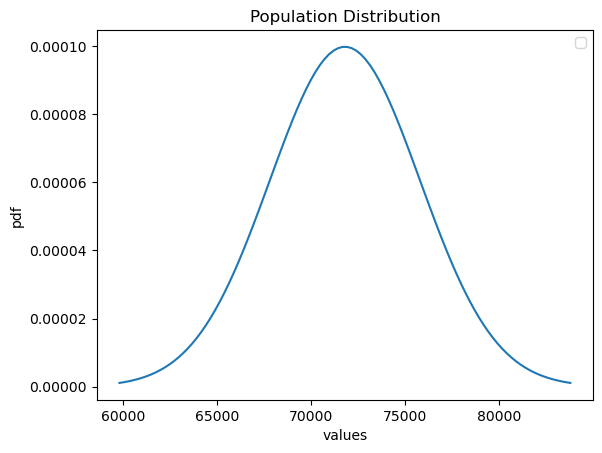

In [61]:
# 모집단 분포 그래프
x = np.linspace(mean - 3*std, mean + 3*std, 100)

pdf_values = stats.norm.pdf(x, mean, std)

plt.plot(x, pdf_values)
plt.title('Population Distribution')
plt.xlabel('values')
plt.ylabel('pdf')
plt.legend()
plt.show()

/var/folders/57/tvb9m9bs7vb1zpsxxct15zn80000gn/T/ipykernel_75280/1581419979.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


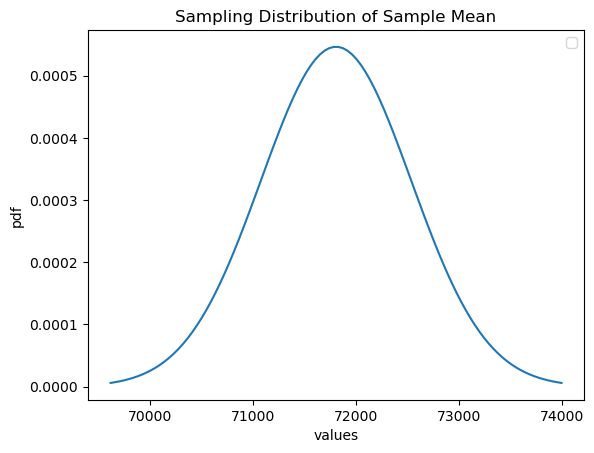

In [65]:
# 표본평균의 분포 그래프

e_sample_mean = eai_500sample['sample_mean'].mean().round(0)

x = np.linspace(e_sample_mean - 3*se_sample_mean, e_sample_mean + 3*se_sample_mean, 100)

pdf_values = stats.norm.pdf(x, e_sample_mean, se_sample_mean)

plt.plot(x, pdf_values)
plt.title('Sampling Distribution of Sample Mean')
plt.xlabel('values')
plt.ylabel('pdf')
plt.legend()
plt.show()


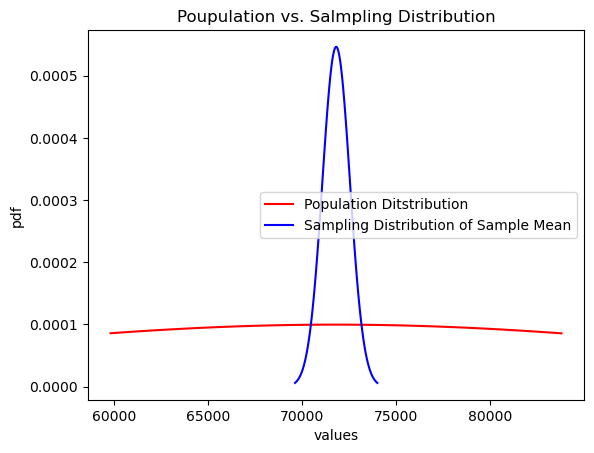

In [68]:
# 두 그래프를 중첩해서 그려보자

# 모집단 분포 그래프 데이터
x1 = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf_values1 = stats.norm.pdf(x, mean, std)

# 평균의 표본 분포 그래프 데이터
x2 = np.linspace(e_sample_mean -3 * se_sample_mean, e_sample_mean + 3*se_sample_mean, 100)
pdf_values2 = stats.norm.pdf(x, e_sample_mean, se_sample_mean)

# 두 그래프 그리기
plt.plot(x1, pdf_values1, color='r', label='Population Ditstribution')
plt.plot(x2, pdf_values2, color='b', label='Sampling Distribution of Sample Mean')

plt.title('Poupulation vs. Salmpling Distribution')
plt.xlabel('values')
plt.ylabel('pdf')
plt.legend()
plt.show()

In [71]:
# 398쪽 

# 모집단 평균 71800달러로부터 500달러 이내 범위에 표본평균이 존재할 확률

Z = round((500 / se_sample_mean), 2)
Z, -Z, round(stats.norm.cdf(Z) - stats.norm.cdf(-Z), 4)

(np.float64(0.68), np.float64(-0.68), np.float64(0.5035))

7.6 표본비율의 표본분포

In [73]:
# 표본비율의 평균

eai_500sample['sample_ratio'].mean().round(4)


np.float64(0.5941)

In [74]:
e_sample_ratio = eai_500sample['sample_ratio'].mean().round(4)

In [75]:
# 표본비율의 표준오차
se_sample_ratio = np.sqrt((yes_ratio * (1- yes_ratio)) / 30)
round(se_sample_ratio, 4)


np.float64(0.0894)

/var/folders/57/tvb9m9bs7vb1zpsxxct15zn80000gn/T/ipykernel_75280/836823583.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


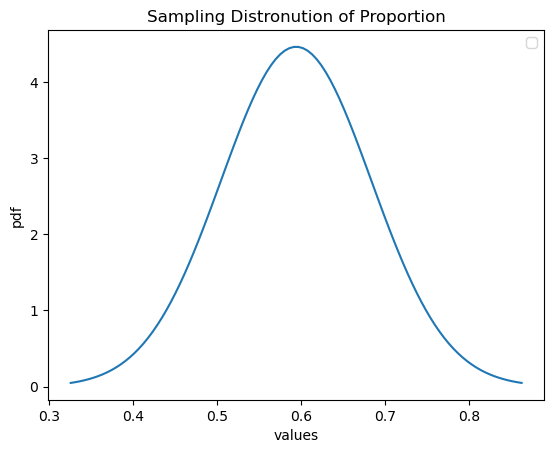

In [ ]:
# 그래프 그리기

x3 = np.linspace(e_sample_ratio - 3 * se_sample_ratio, e_sample_ratio + 3 * se_sample_ratio, 100)
pdf_values3 = stats.norm.pdf(x3, e_sample_ratio, se_sample_ratio)

plt.plot(x3, pdf_values3)
plt.title('Sampling Distronution of Proportion')
plt.xlabel('values')
plt.ylabel('pdf')
plt.legend()
plt.show()

In [77]:
# 407쪽 모집단 비율로부터 0.05 이내 범위에 표본비율이 존재할 확률
Z = round((0.05 / se_sample_ratio), 2)
Z, -Z, round((stats.norm.cdf(Z) - stats.norm.cdf(-Z)), 4)


(np.float64(0.56), np.float64(-0.56), np.float64(0.4245))